In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

# sns.set_style(style='white')
sns.set_context(context ='paper')

pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

font_path = 'c:/Windows/Fonts/NanumSquareRoundR.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

In [2]:
air = pd.read_csv('air.csv')
app = pd.read_csv('app.csv', encoding = 'euc-kr')

In [3]:
air.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20181107,강남구,0.052,0.002,0.8,0.006,92.0,64.0
1,20181107,강남대로,0.053,0.004,1.0,0.004,105.0,85.0
2,20181107,강동구,0.053,0.004,0.9,0.010,97.0,58.0
3,20181107,강변북로,0.056,0.004,0.9,0.004,99.0,78.0
4,20181107,강북구,0.036,0.011,0.7,0.003,68.0,52.0


# 마케팅 효과 -> 앱 다운로드 수 예측

1. 마케팅 효과
2. 외부요인(미세먼지 농도,정책, 언론 등등)

In [4]:
air.groupby('측정일시')['초미세먼지(㎍/㎥)'].mean().tail(30).mean()

22.81015022541338

### 앱 다운 인원

-평소 디폴트 다운로드 250명

1.마케팅 효과
- skt sns 채널
- 티월드 배너
- 이벤트(공기촘촘, 엄마니까)
- MMS (디톨트 반응 비율 0.2%) : 19일 17만 30일 50만 7일 60만
- 서포터즈
- 인스타인플루언서
- 파워블로거
- 네이버 광고
- 구글플레이 광고
- 인스타그램 sns 영상

2.외부효과

- 언론 언급
- 미세먼지 수치 26 : 평소 2배 38 : 평소 4배 -> 전체 인원에 적용

In [5]:
air.groupby('측정일시')['초미세먼지(㎍/㎥)'].mean().head(55)

측정일시
20171107    26.025641
20171108    30.051282
20171109    24.512821
20171110    21.461538
20171111    13.076923
20171112    18.512821
20171113    24.538462
20171114    16.948718
20171115    11.512821
20171116    13.666667
20171117    24.000000
20171118    20.948718
20171119    11.743590
20171120    21.512821
20171121    30.846154
20171122    30.179487
20171123    11.205128
20171124    12.589744
20171125    16.641026
20171126    23.394737
20171127    29.657895
20171128    46.897436
20171129    24.179487
20171130     8.794872
20171201    12.974359
20171202    24.153846
20171203    35.128205
20171204    25.871795
20171205    10.871795
20171206    21.282051
20171207    31.179487
20171208    20.487179
20171209    24.307692
20171210    24.230769
20171211     9.589744
20171212    16.461538
20171213    18.897436
20171214    35.000000
20171215    55.512821
20171216    44.184211
20171217    12.842105
20171218    33.868421
20171219    18.578947
20171220    24.421053
20171221    37.540541
20171

In [6]:
app

,날짜,다운로드
0,18.10.10,1442
1,18.10.11,611
2,18.10.12,167
3,18.10.13,166
4,18.10.14,325
5,18.10.15,301
6,18.10.16,278
7,18.10.17,197
8,18.10.18,132
9,18.10.19,343


In [7]:
prediction = pd.read_csv('prediction.csv', encoding = 'euc-kr')

In [8]:
prediction.이벤트 = prediction.이벤트 *150
prediction.외부매체 = prediction.외부매체 *50
prediction.skt = prediction.skt *100
prediction.서포터즈 = prediction.서포터즈 *50
prediction.인스타영상 = prediction.인스타영상 *50
prediction.구글플레이 = prediction.구글플레이 *50
prediction.파워블로거 = prediction.파워블로거 *50
prediction.인스타인플루언서 = prediction.인스타인플루언서 *50
prediction.네이버브랜드 = prediction.네이버브랜드 *100
prediction.MMS = prediction.MMS *1000

In [9]:
def pm(x):
    if 26 < x < 38 :
        return 2
    elif 38 < x:
        return 4
    else:
        return 1

In [10]:
prediction['먼지영향'] = prediction.PM2.map(pm)

In [11]:
prediction.head(15)

,날짜,PM2,기본,MMS,이벤트,외부매체,skt,서포터즈,인스타영상,구글플레이,파워블로거,인스타인플루언서,네이버브랜드,먼지영향
0,18.11.08,30.051282,250,0,150,50,100,0,0,0,0,0,0,2
1,18.11.09,24.512821,250,0,150,50,100,0,0,0,0,0,0,1
2,18.11.10,21.461538,250,0,150,50,100,0,0,0,0,0,0,1
3,18.11.11,13.076923,250,0,150,50,100,0,0,0,0,0,0,1
4,18.11.12,18.512821,250,0,150,50,100,50,0,50,0,50,100,1
5,18.11.13,24.538462,250,0,150,50,100,50,0,50,0,50,100,1
6,18.11.14,16.948718,250,0,150,50,100,50,0,50,0,50,100,1
7,18.11.15,11.512821,250,0,150,50,100,50,0,50,50,50,100,1
8,18.11.16,13.666667,250,0,150,50,100,50,0,50,50,50,100,1
9,18.11.17,24.000000,250,0,150,50,100,50,0,50,50,50,100,1


In [12]:
temp_list = list()
for i in range(len(prediction)):
    temp_list.append(prediction.iloc[i,2:-1].sum())

In [13]:
prediction['temp'] = temp_list

In [14]:
prediction['다운로드'] = prediction.temp * prediction.먼지영향

In [15]:
prediction.다운로드.sum()

83950

In [16]:
result = pd.concat([app,prediction[['날짜','다운로드']]])

In [17]:
result[0:5].다운로드.sum()

2711

In [18]:
i = 12
download = []
while i < len(result) :
    download.append(np.sum(result.다운로드[:i]))
    i = i + 7

In [19]:
download

[4635, 6761, 9033, 18781, 24581, 32681, 46381, 53581, 68781, 80781, 98381]

In [20]:
np.sum(result.다운로드) + 4000

103981

In [21]:
download = [2711,4635, 6761, 9033, 18781, 24581, 32681, 46381, 53581, 65781, 77781,  98381, 103981]

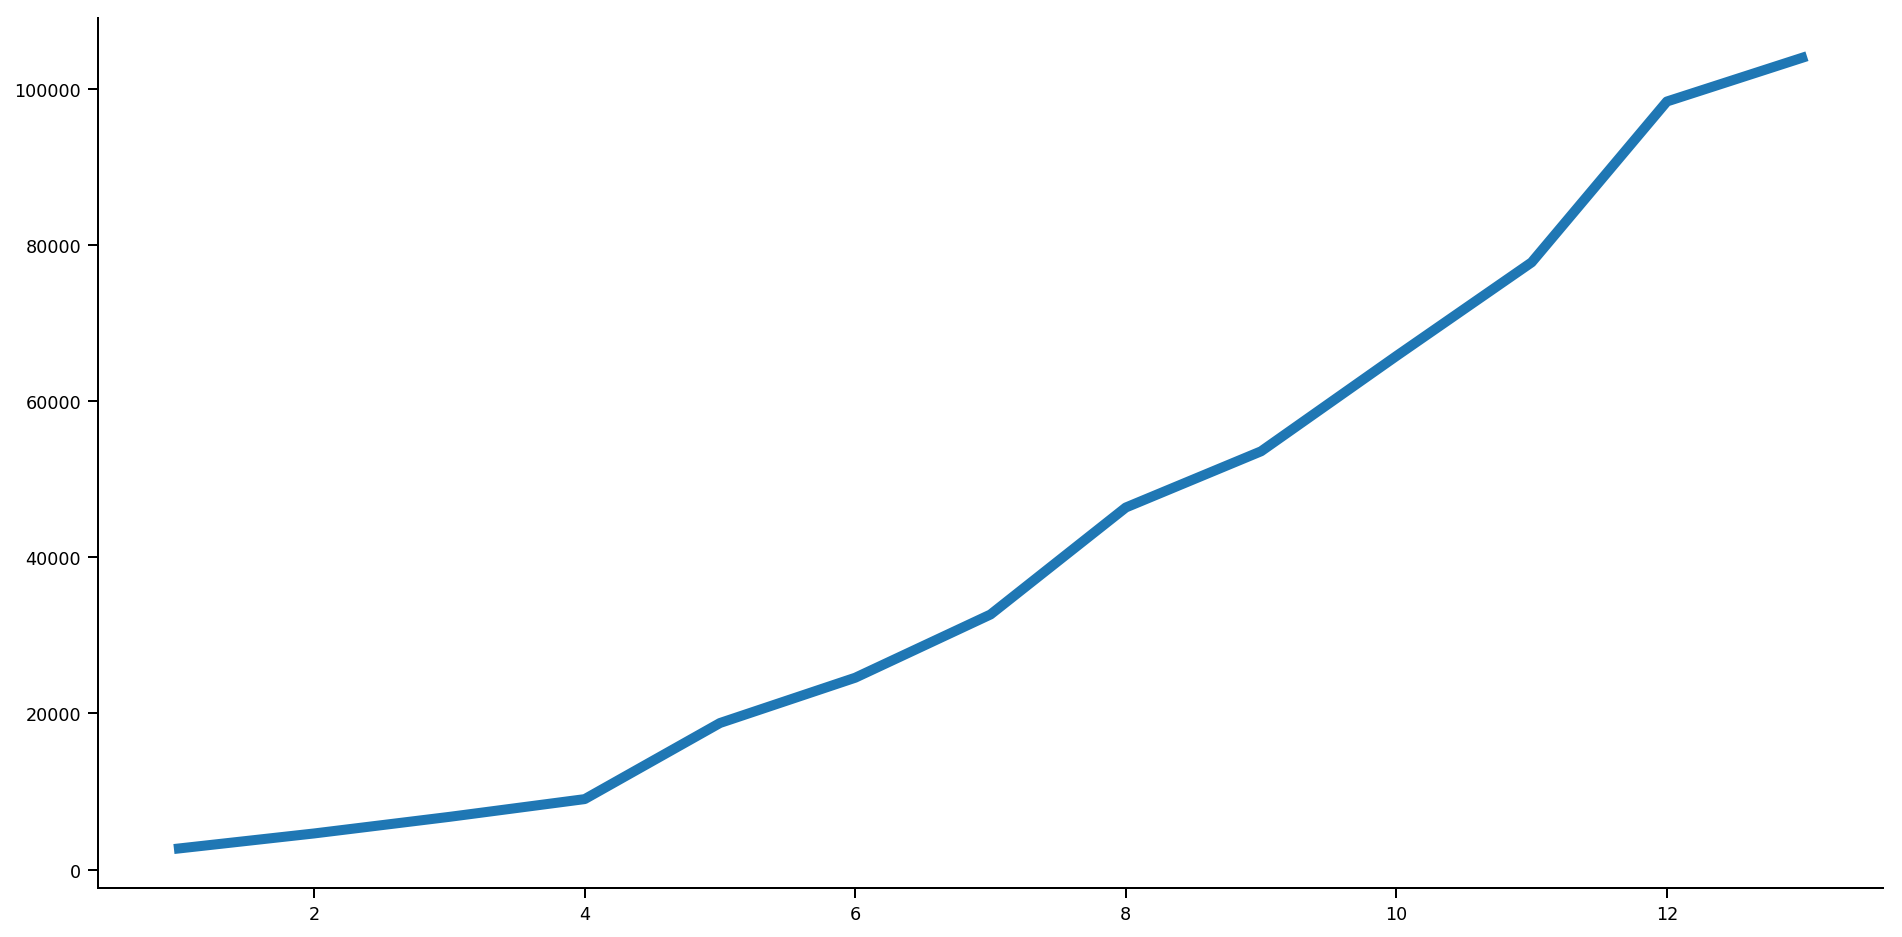

In [23]:
plt.figure(figsize=(16,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],download ,linewidth = 5)
sns.despine()
plt.show()

# 외부영향과 추가 변화가 있디면 더 추가

In [29]:
prediction['외부매체_future'] = prediction.인스타영상 + prediction.구글플레이 + prediction.파워블로거 + prediction.인스타인플루언서 + prediction.네이버브랜드

In [35]:
prediction[['날짜','PM2','기본','MMS','이벤트','외부매체','skt','서포터즈','외부매체_future','먼지영향','다운로드']].to_csv('data')